## Importando as bibliotecas

In [69]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max.rows', None,'display.max.columns', None)

## Importando os dados

In [70]:
dataset = pd.read_csv('../Dados/DadosTelco.csv', sep=';')
dataset.head()

,clienteId,cancelouPlano,genero,cidadaoIdoso,temParceiro,temDependentes,mesesContrato,assinaturaTelefonica,multiplasLinhas,provedorInternet,segurancaOnline,backupOnline,protecaoDispositivo,suporteTecnico,streamingTV,streamingFilmes,tipoContrato,contaOnline,gastoDiario,formaPagamento,totalServicosMensalmente,totalGasto,validacaoTotalGasto,diferencaTotalGasto
0,0002-ORFBO,Não,Feminino,Não,Sim,Sim,9,Sim,Não,DSL,Não,Sim,Não,Sim,Sim,Não,Um ano,Sim,2.0,Conta Enviada,65.6,593.30,590.4,2.90
1,0003-MKNFE,Não,Masculino,Não,Não,Não,9,Sim,Sim,DSL,Não,Não,Não,Não,Não,Sim,Mensal,Não,2.0,Conta Enviada,59.9,542.40,539.1,3.30
2,0004-TLHLJ,Sim,Masculino,Não,Não,Não,4,Sim,Não,Fibra ótica,Não,Não,Sim,Não,Não,Não,Mensal,Sim,2.0,Conta Eletrônica,73.9,280.85,295.6,-14.75
3,0011-IGKFF,Sim,Masculino,Sim,Sim,Não,13,Sim,Não,Fibra ótica,Não,Sim,Sim,Não,Sim,Sim,Mensal,Sim,3.0,Conta Eletrônica,98.0,1237.85,1274.0,-36.15
4,0013-EXCHZ,Sim,Feminino,Sim,Sim,Não,3,Sim,Não,Fibra ótica,Não,Não,Não,Sim,Sim,Não,Mensal,Sim,3.0,Conta Enviada,83.9,267.40,251.7,15.70


## Análise Exploratória

###  Variável Churn

Verificando a variável de Churn(cancelouPlano)

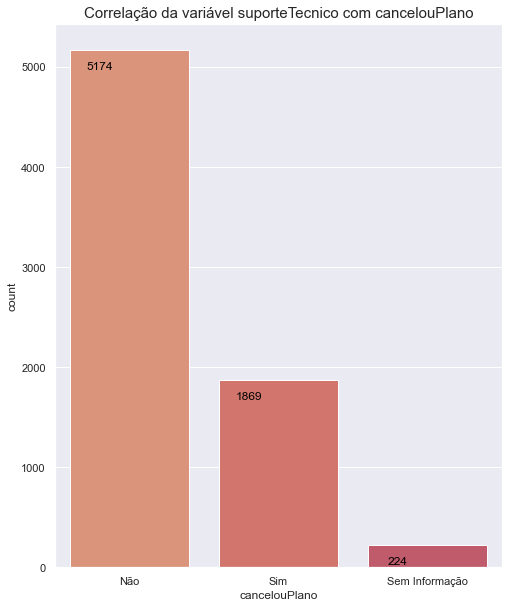

In [96]:
sns.set_palette("flare")
ax = sns.countplot(x='cancelouPlano', data=dataset)
ax.set_title('Correlação da variável suporteTecnico com cancelouPlano', fontsize=15)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=12)
plt.show()

Verificando a relação da variável de Churn com as outras variáveis

 ### Correlação com as outras variáveis

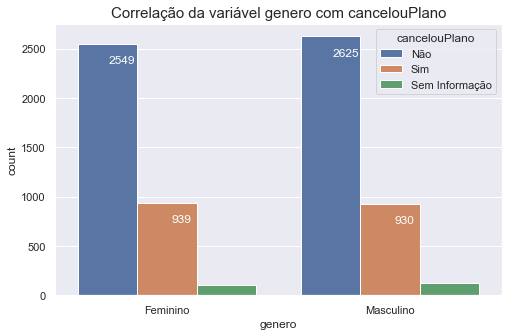

In [72]:
sns.set_theme(style="darkgrid")
fig, axs = plt.subplots(figsize=[8,5])

ax = sns.countplot(x='genero', hue='cancelouPlano', data=dataset)
ax.set_title('Correlação da variável genero com cancelouPlano', fontsize=15)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=12)
plt.show()

##### Checando com o Gráfico de Correlação

Traduzindo os registros do dataframe numericamente para visualizar no heatmap as correlações

In [73]:
df_numerized = dataset.copy()
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized = df_numerized.drop(columns=['clienteId'])
df_numerized.head()

,cancelouPlano,genero,cidadaoIdoso,temParceiro,temDependentes,mesesContrato,assinaturaTelefonica,multiplasLinhas,provedorInternet,segurancaOnline,backupOnline,protecaoDispositivo,suporteTecnico,streamingTV,streamingFilmes,tipoContrato,contaOnline,gastoDiario,formaPagamento,totalServicosMensalmente,totalGasto,validacaoTotalGasto,diferencaTotalGasto
0,0,0,0,1,1,9,1,0,0,0,2,0,2,2,0,2,1,2.0,2,65.6,593.30,590.4,2.90
1,0,1,0,0,0,9,1,2,0,0,0,0,0,0,2,1,0,2.0,2,59.9,542.40,539.1,3.30
2,2,1,0,0,0,4,1,0,1,0,0,2,0,0,0,1,1,2.0,1,73.9,280.85,295.6,-14.75
3,2,1,1,1,0,13,1,0,1,0,2,2,0,2,2,1,1,3.0,1,98.0,1237.85,1274.0,-36.15
4,2,0,1,1,0,3,1,0,1,0,0,0,2,2,0,1,1,3.0,2,83.9,267.40,251.7,15.70


Text(156.453125, 0.5, 'Características dos Clientes')

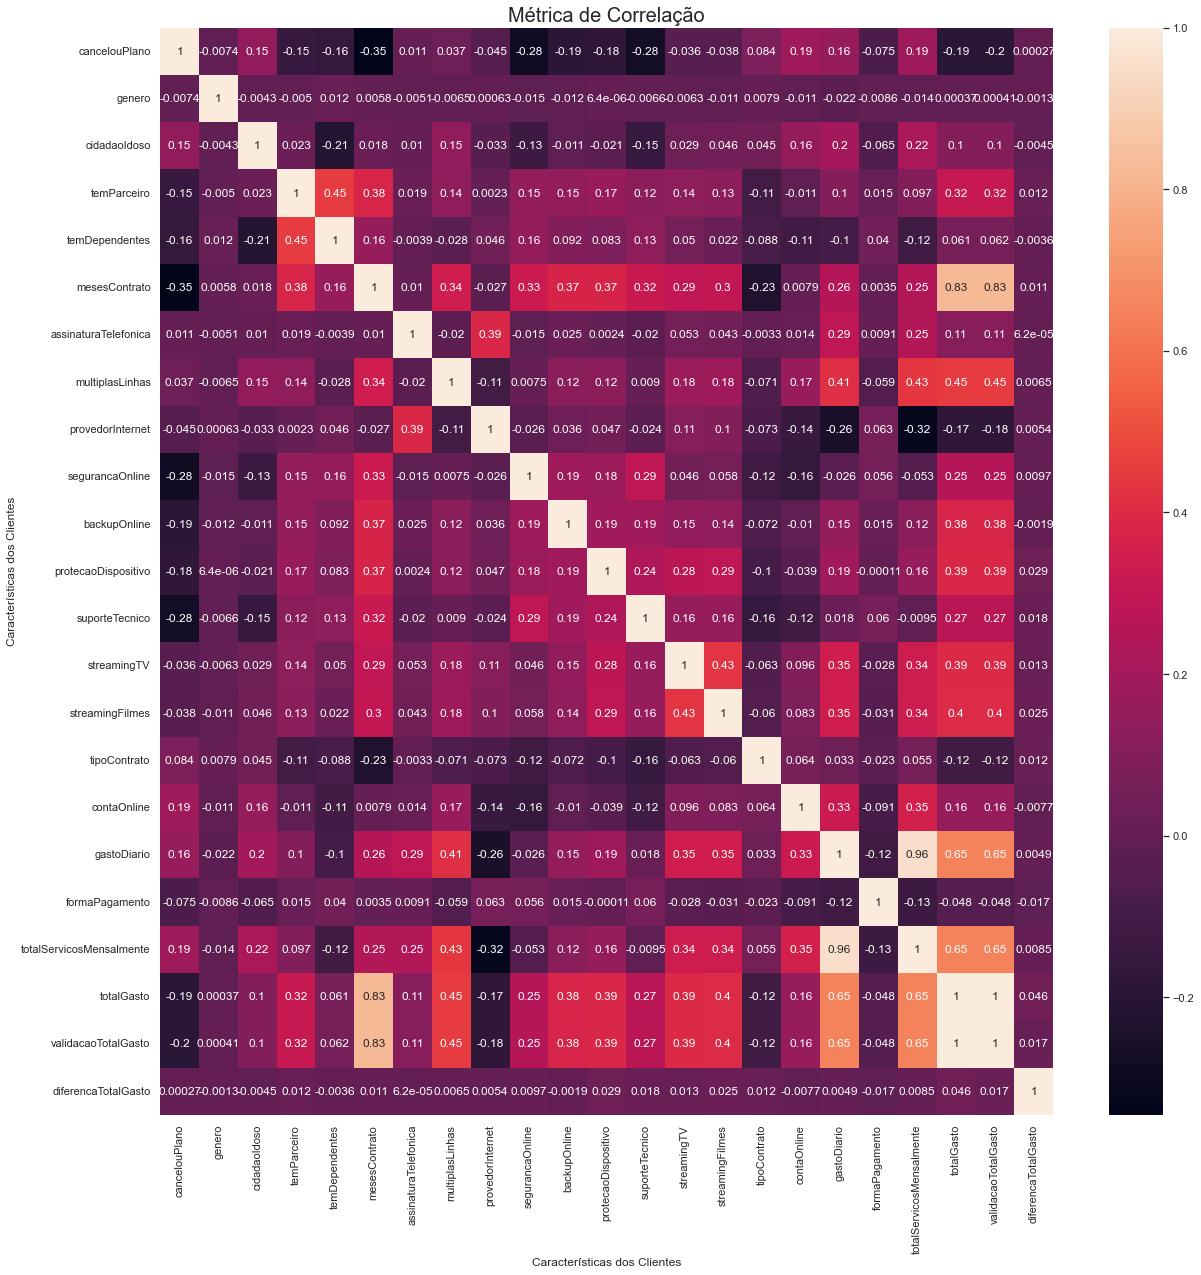

In [74]:
correlation_matrix = df_numerized.corr(method='pearson')

fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(correlation_matrix, annot=True, ax=ax)
plt.title('Métrica de Correlação', size=20)
plt.xlabel('Características dos Clientes')
plt.ylabel('Características dos Clientes')


Analisar mais a fundo as seguintes colunas: cidadaoIdoso, mesesContrato, segurançaOnline, suporteTecnico, contaOline, gastoDiario, totalServicosMensalmente

##### Correlação com cidadaoIdoso 

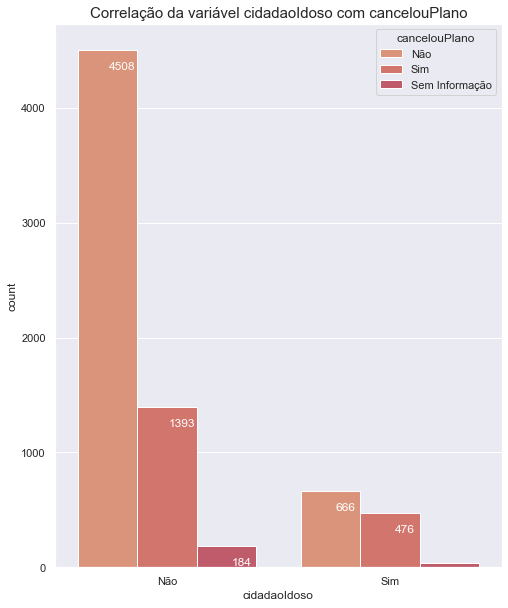

In [83]:
sns.set_palette("flare")
ax =  sns.countplot(x='cidadaoIdoso', hue='cancelouPlano', data=dataset)
ax.set_title('Correlação da variável cidadaoIdoso com cancelouPlano', fontsize=15)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=12)
plt.show()

A taxa de cancelamento para os poucos clientes idosos que temos é quase de 50%, teriamos que validar se podemos montar melhores pacotes para esse público (dependendo se ele é alvo ou não)

##### Correlação com suporteTecnico

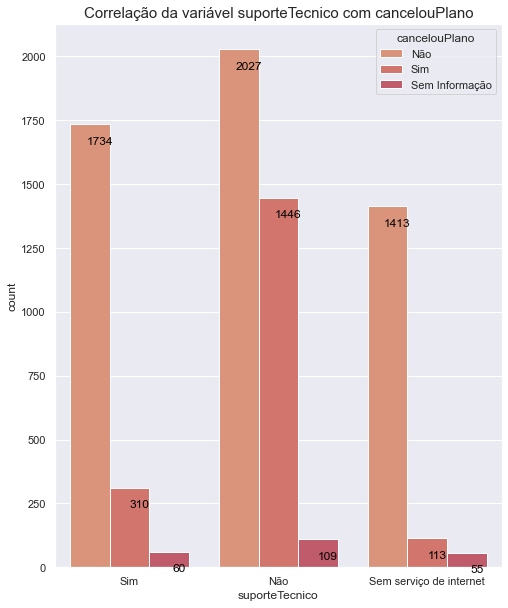

In [85]:
sns.set_palette("flare")
ax =  sns.countplot(x='suporteTecnico', hue='cancelouPlano', data=dataset)
ax.set_title('Correlação da variável suporteTecnico com cancelouPlano', fontsize=15)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=12)
plt.show()

Clientes que não tem suporte técnico tendem a cancelar mais o plano:
 - A busca por ajuda sem o suporte especializado pode ser muito dificil/demorada normalmente

##### Correlação com contaOnline e forma de pagamento

Temos uma alta evasão de clientes com conta eletrônica 

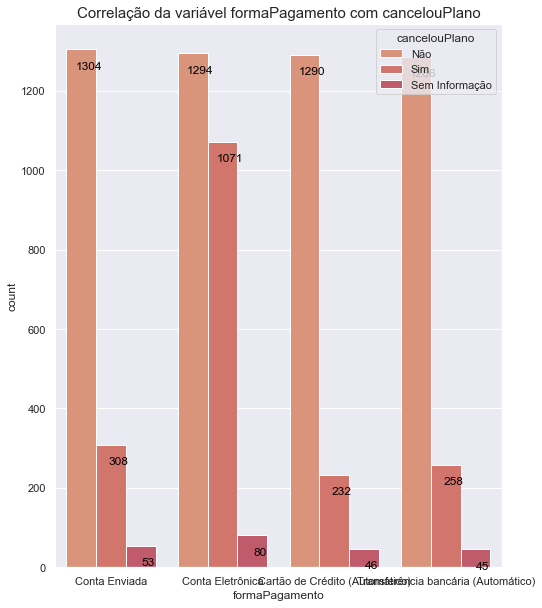

In [86]:
sns.set_palette("flare")
ax =  sns.countplot(x='formaPagamento', hue='cancelouPlano', data=dataset)
ax.set_title('Correlação da variável formaPagamento com cancelouPlano', fontsize=15)
plt.rcParams["figure.figsize"] = (8, 10)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=12)
plt.show()

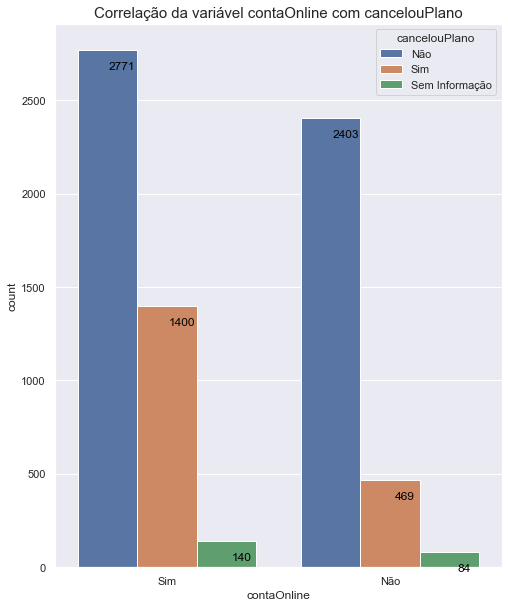

In [79]:
ax =  sns.countplot(x='contaOnline', hue='cancelouPlano', data=dataset)
ax.set_title('Correlação da variável contaOnline com cancelouPlano', fontsize=15)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=12)
plt.show()

Temos uma alta evasão de clientes com conta online junto com a conta eletrônica 

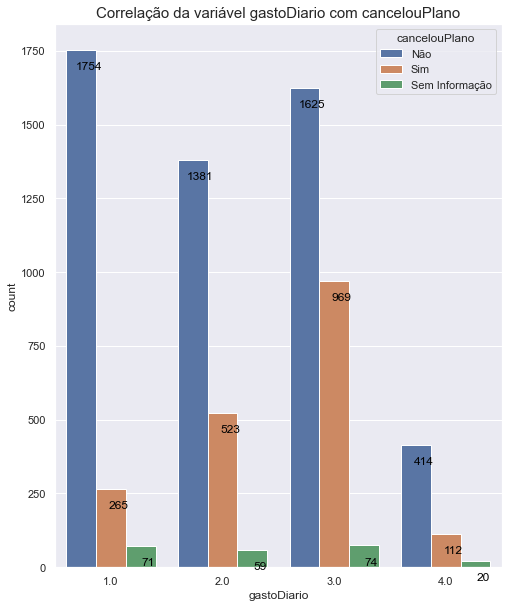

In [80]:
ax =  sns.countplot(x='gastoDiario', hue='cancelouPlano', data=dataset)
ax.set_title('Correlação da variável gastoDiario com cancelouPlano', fontsize=15)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=12)
plt.show()

##### Correlação com segurancaOnline, backupOnline, streamingTV, streamingFilmes, assinaturaTelefonica, multiplasLinhas e protecaoDispositivo

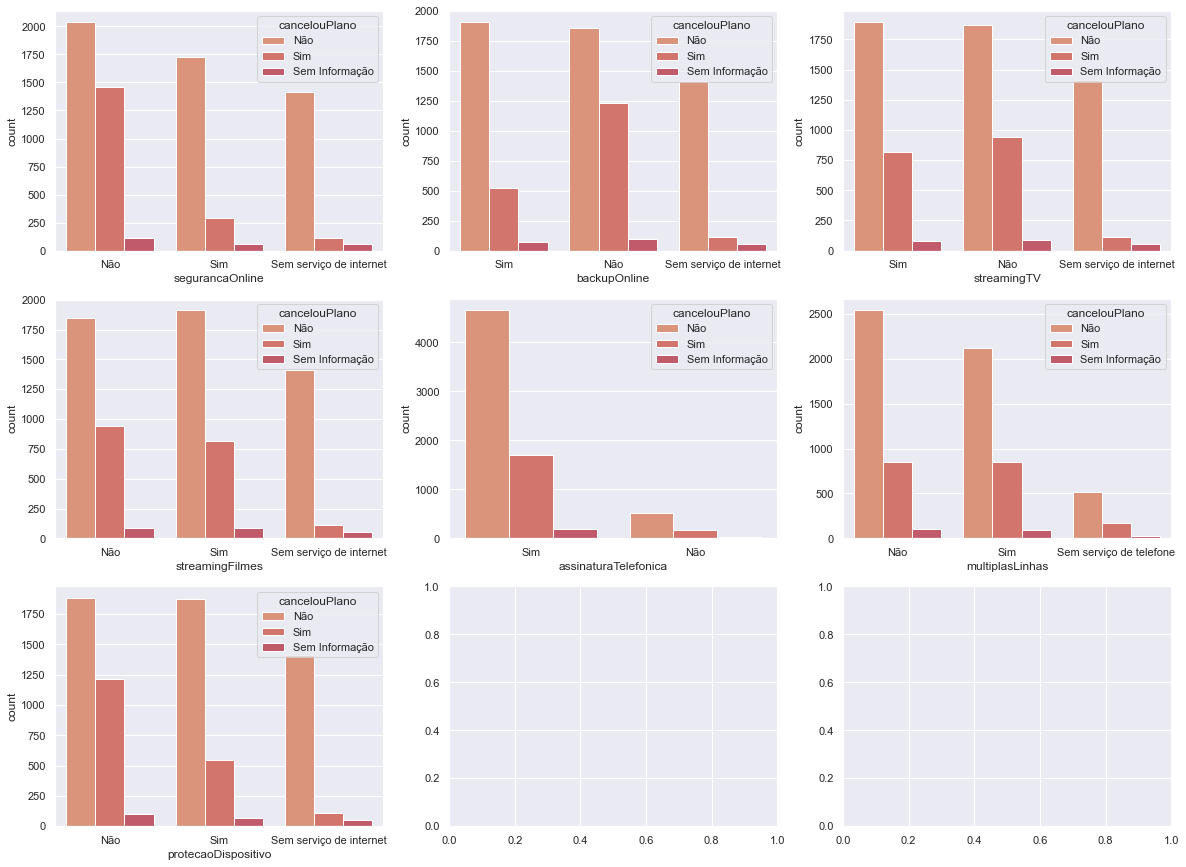

In [87]:
columns = [
   'segurancaOnline',
    'backupOnline',
    'streamingTV',
    'streamingFilmes',
    'assinaturaTelefonica',
    'multiplasLinhas',
    'protecaoDispositivo' 
]
sns.set_palette("flare")
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=[20,15])
axs = axs.flatten()
i=0
for col in columns:
    sns.countplot(x=dataset[col], hue='cancelouPlano', data=dataset, ax=axs[i])
    i = i + 1
  

##### Correlação com provedorInternet (A proporção de clientes com fibra ótica que cancelaram é bem grande) 

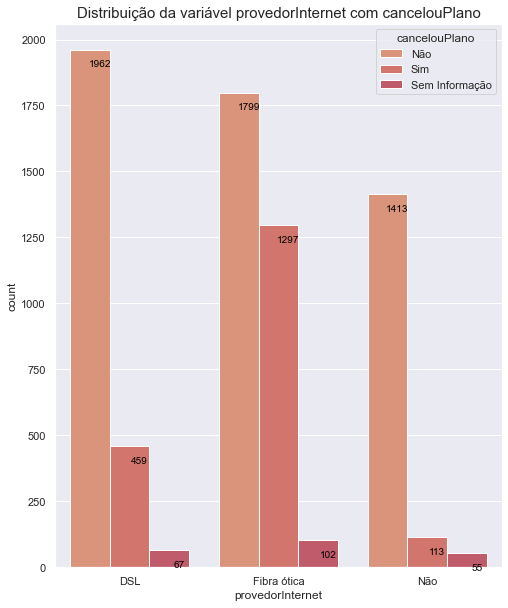

In [84]:
sns.set_palette("flare")
ax = sns.countplot(x= 'provedorInternet', hue='cancelouPlano', data=dataset)
ax.set_title('Distribuição da variável provedorInternet com cancelouPlano', fontsize=15)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=10
               )
plt.show()

Acredito que devemos verificar se temos algum problema de perda de pacote etc pois o churn está muito alto para esse provedor.

### Distribuição da Variável churn 

#### Distribuição Churn X  meses de contrato / tipo contrato

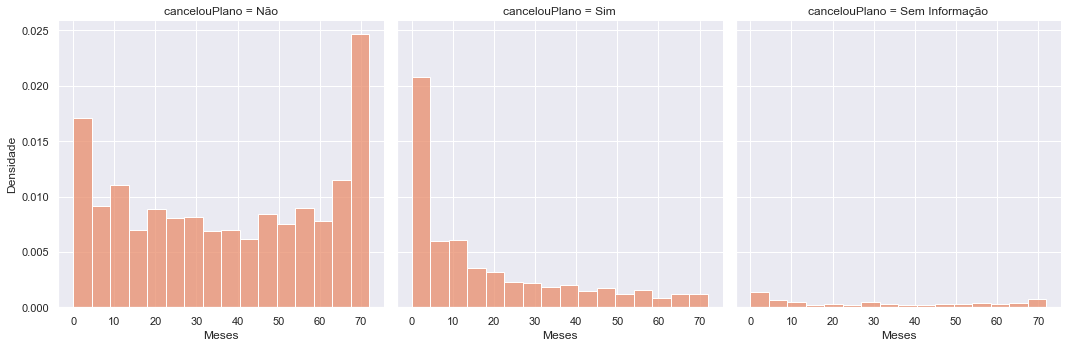

In [88]:
sns.set_palette("flare")
histograma = sns.displot(dataset, x='mesesContrato', col='cancelouPlano', stat="density")
histograma.set_xlabels("Meses")
histograma.set_ylabels("Densidade")
histograma

####  Distribuição Churn X  gastoDiario

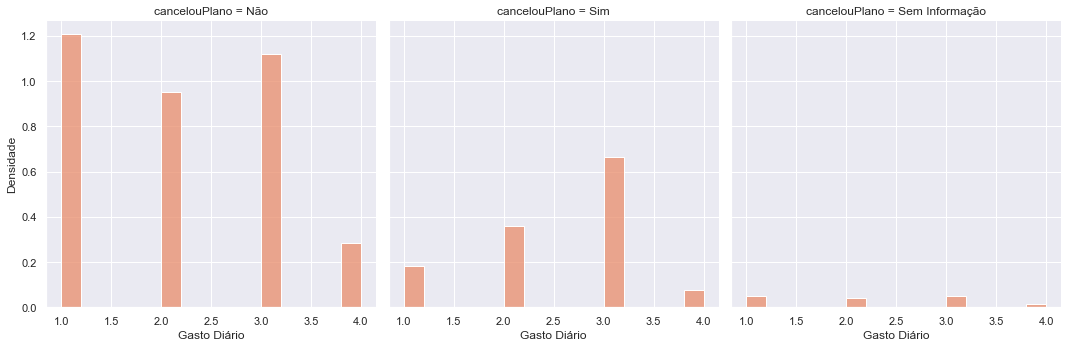

In [91]:
sns.set_palette("flare")
histograma = sns.displot(dataset, x='gastoDiario', col='cancelouPlano', stat="density")
histograma.set_xlabels("Gasto Diário")
histograma.set_ylabels("Densidade")
histograma

####  Distribuição Churn X  totalServicosMensalmente

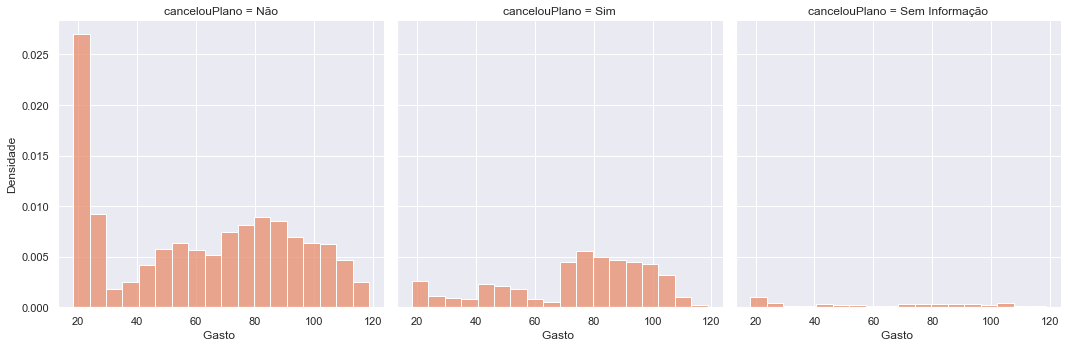

In [99]:
sns.set_palette("flare")

histograma = sns.displot(dataset, x='totalServicosMensalmente', col='cancelouPlano', stat="density")
histograma.set_xlabels("Gasto ")
histograma.set_ylabels("Densidade")
histograma

### Conclusão

A correlação entre o cancelamento:
- Idosos tem uma alta taxa de cancelamento
- Pessoas que não tem segurança online tem cancelado mais 
- Pessoas sem backup online tem cancelado mais 
- Pessoas que não tem suporte tem cancelado mais 
- Pessoas com contratos mensais tem mais chance de cancelar o plano e cancelam nos primeiros meses
- As pessoas que cancelam pagam mensalmente entre 70-100 reais
- Pessoas com conta eletrônica tem uma alta taxa de cancelamento

Logo, clientes novos tem mais tendência de cancelar o seu plano comparado com clientes antigos. Os clientes com menos serviços (Segurança Online, suporte e backup) tem mais chances de cancelar, provavelmente porque o plano "deixa a desejar" nesses pontos, dificultando o uso. 

As pessoas preferem o pagamento eletrônico, porém a maioria das pessoas que cancelam utilizam a conta eletrônica e tem o contato mensal. Verificamos que os clientes que pagam entre 70-100 mensalmente tem mais chances de cancelar o plano (seria interessante verificar planos de desconto pensando na permanencia dos proximos clientes).

